# Bangluru House Price Prediction

## Import Laibraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

# Load Dataset

In [2]:
data=pd.read_csv("bengaluru_house_prices.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Exploratory Data Analysis (EDA) 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


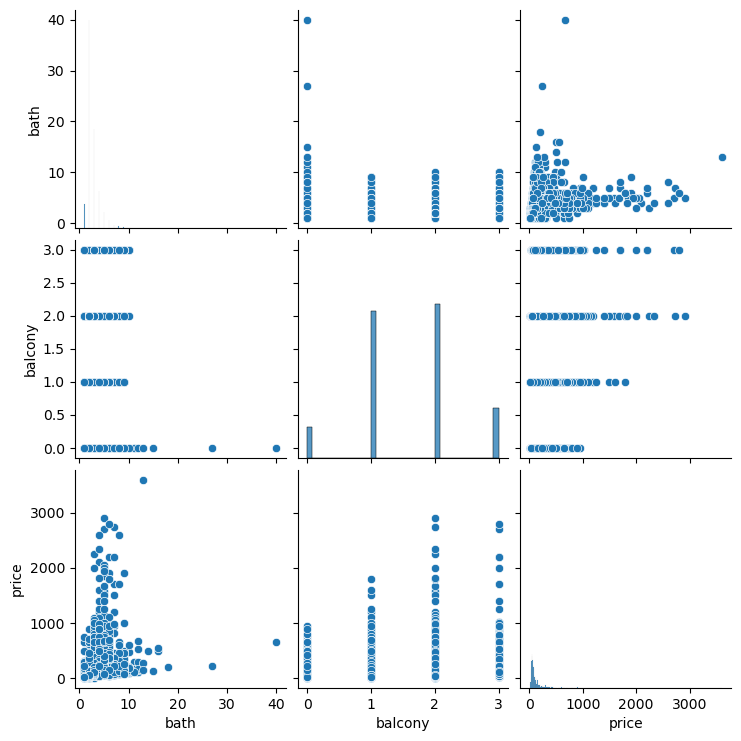

In [6]:
# supress all Warnings
warnings.filterwarnings('ignore')
# plot the pair plot
sns.pairplot(data)

In [7]:
# count values for each feature
def values_count(data):
    for i in data.columns:
        print(data[i].value_counts())
        print("--------------------------")


In [8]:
values_count(data)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------------------

<Axes: >

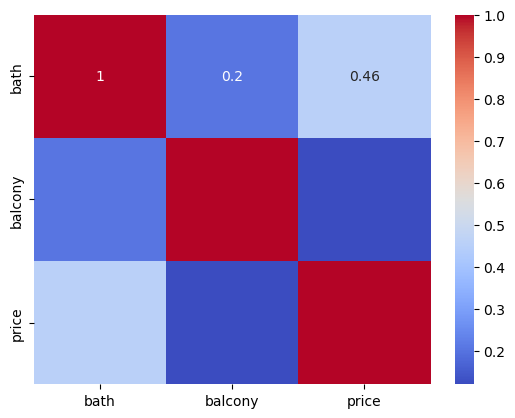

In [9]:
num_values=["bath","balcony","price"]
sns.heatmap(data[num_values].corr(),cmap='coolwarm',annot=True)

In [10]:
# checking for null values
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
# to find percentage of our null values
data.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [12]:
data=data.drop(['society'],axis=1)
data.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
data['balcony']=data['balcony'].fillna(data['balcony'].mean())

In [14]:
data=data.dropna()
data.shape

(13246, 8)

In [15]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [16]:
# TO show all columnsand rows in the data set use
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Feature Engineering

# convert cat_data into numerical formate 

In [17]:
sqft=data['total_sqft'].value_counts()
sqft.head(10)

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
1000    172
1350    132
1050    123
1300    117
1250    114
Name: count, dtype: int64

In [18]:
total_sqft_int = []
for str_val in data['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) 
 # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) 
# '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan) 
# if value not contain in above format then consider as nan

In [19]:
# reset the index of dataframe
data = data.reset_index(drop=True) # drop=True - don't add index column in df

In [20]:
# join data and total_srft_int list
data = data.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [21]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [22]:
data=data.dropna()

In [23]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [24]:
# now four columns is numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


## Dealing with Size Feature

In [25]:
data['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [26]:
size_int = []
for str_val in data['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)
 
data = data.reset_index(drop=True)

In [27]:
# join data and list size_int
data = data.join(pd.DataFrame({'BHK':size_int}))
data.shape

(13200, 10)

In [28]:
data.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00,1170.0,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,1.584376,600.00,3300.0,4
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310,3.0,1.000000,63.25,1310.0,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.00,1020.0,6


# Finding and removal of outlier

In [29]:
# function to create histogram, Q-Q plot and boxplot
import scipy.stats as stats
 
def diagnostic_plots(data, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(data[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')
 
    plt.show()
 

******* bath *******


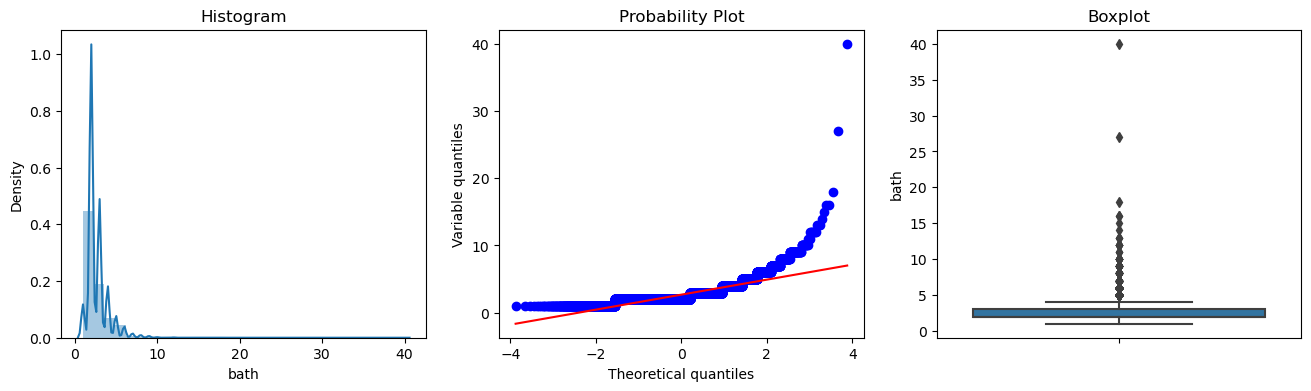

******* balcony *******


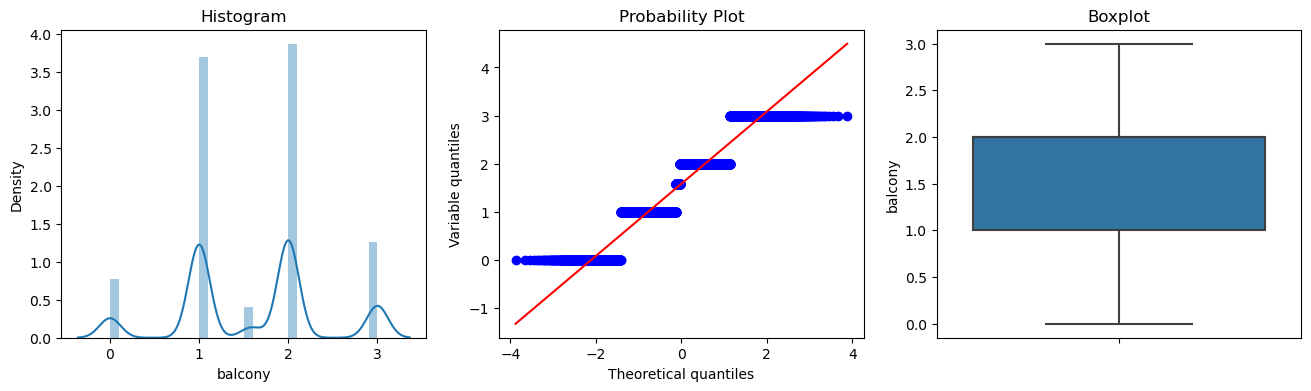

******* total_sqft_int *******


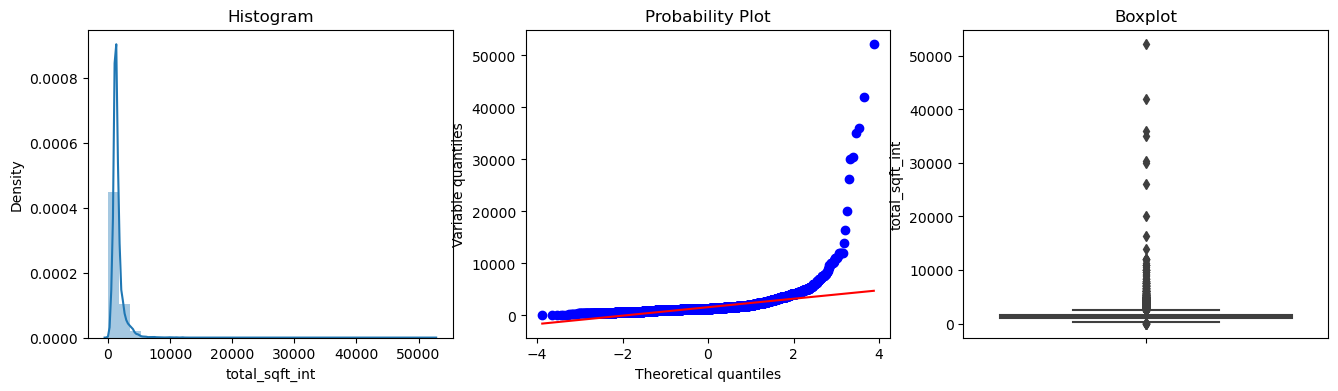

******* BHK *******


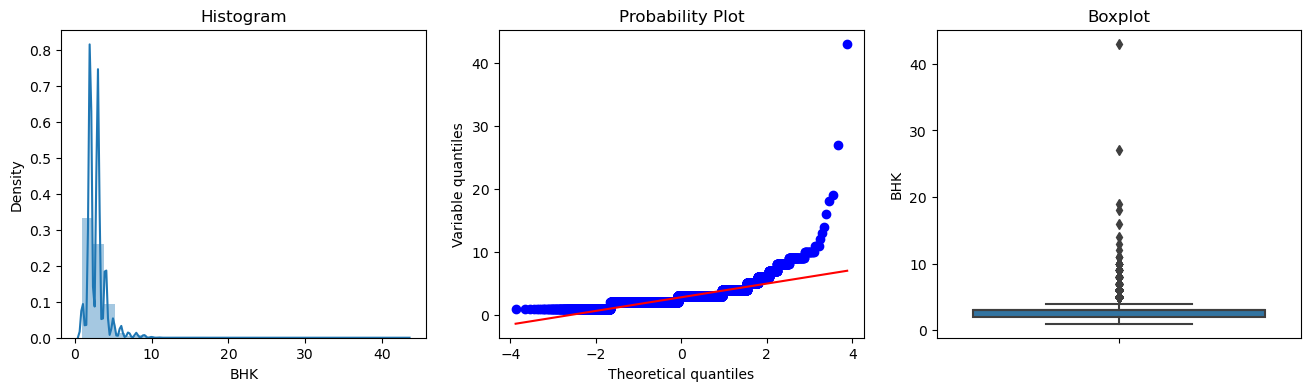

******* price *******


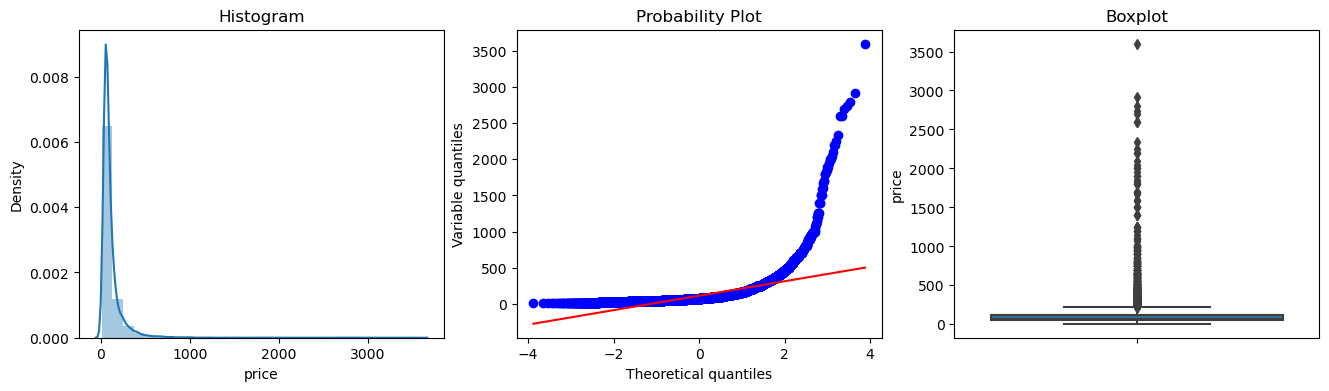

In [30]:
num_var = ["bath","balcony","total_sqft_int","BHK","price"]
for var in num_var:
     print("******* {} *******".format(var))
     diagnostic_plots(data, var)

In [31]:
# here we observe outlier using histogram,, qq plot and boxplot
 
# here we consider  1 BHK requierd min 350 sqft are
data[data['total_sqft_int']/data['BHK'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [32]:
# no we found outliers
 
# if 1 BHK total_sqft are < 350 then we ae going to remove them
data = data[~(data['total_sqft_int']/data['BHK'] < 350)]
data.shape

(12106, 10)

In [33]:
# create new feature that is price per squre foot 
# it help to find the outliers
 
#price in lakh so conver into rupee and then / by total_sqft_int
data['price_per_sqft'] = data['price']*100000 / data['total_sqft_int']  
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [34]:
data.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235
 
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(data):
  df_out = pd.DataFrame()
  for key, subdf in data.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 

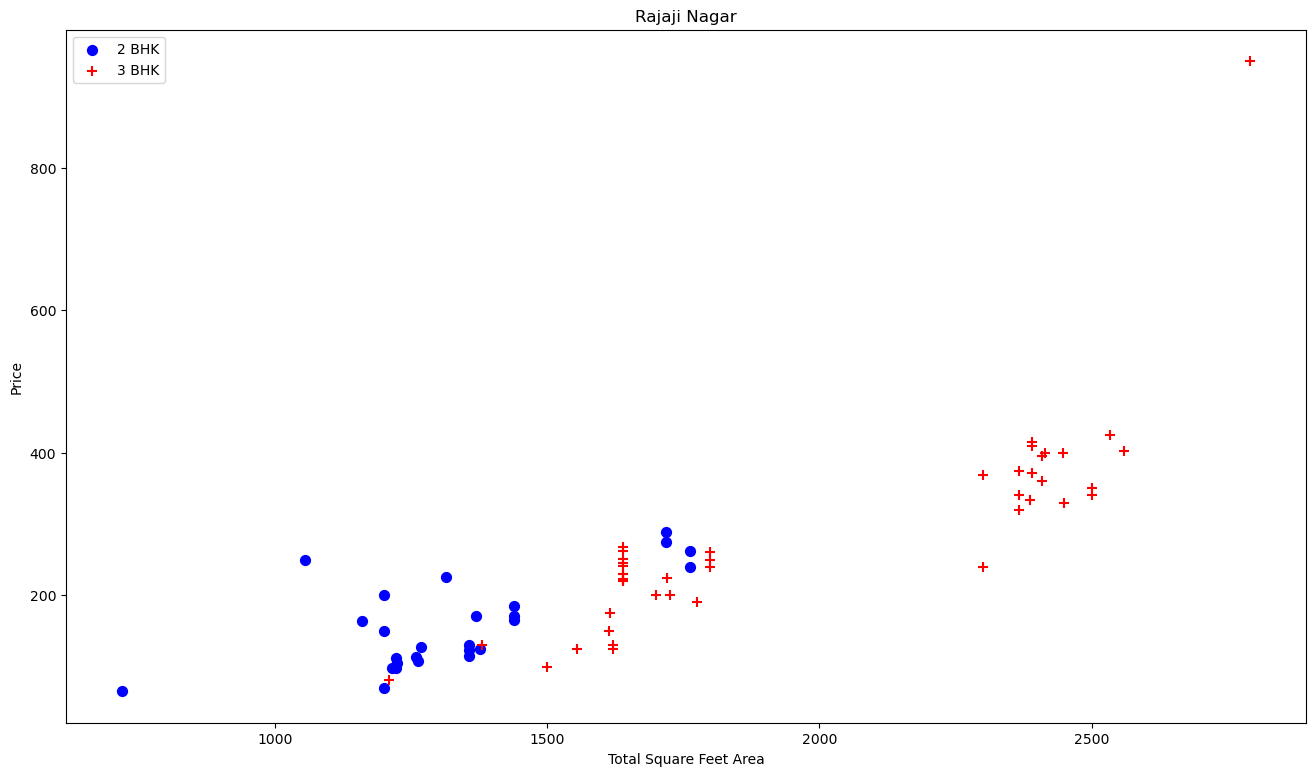

In [36]:
def plot_scatter_chart(data,location):
  bhk2 = data[(data.location==location) & (data.BHK==2)]
  bhk3 = data[(data.location==location) & (data.BHK==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
plot_scatter_chart(data, "Rajaji Nagar")
# in above scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier


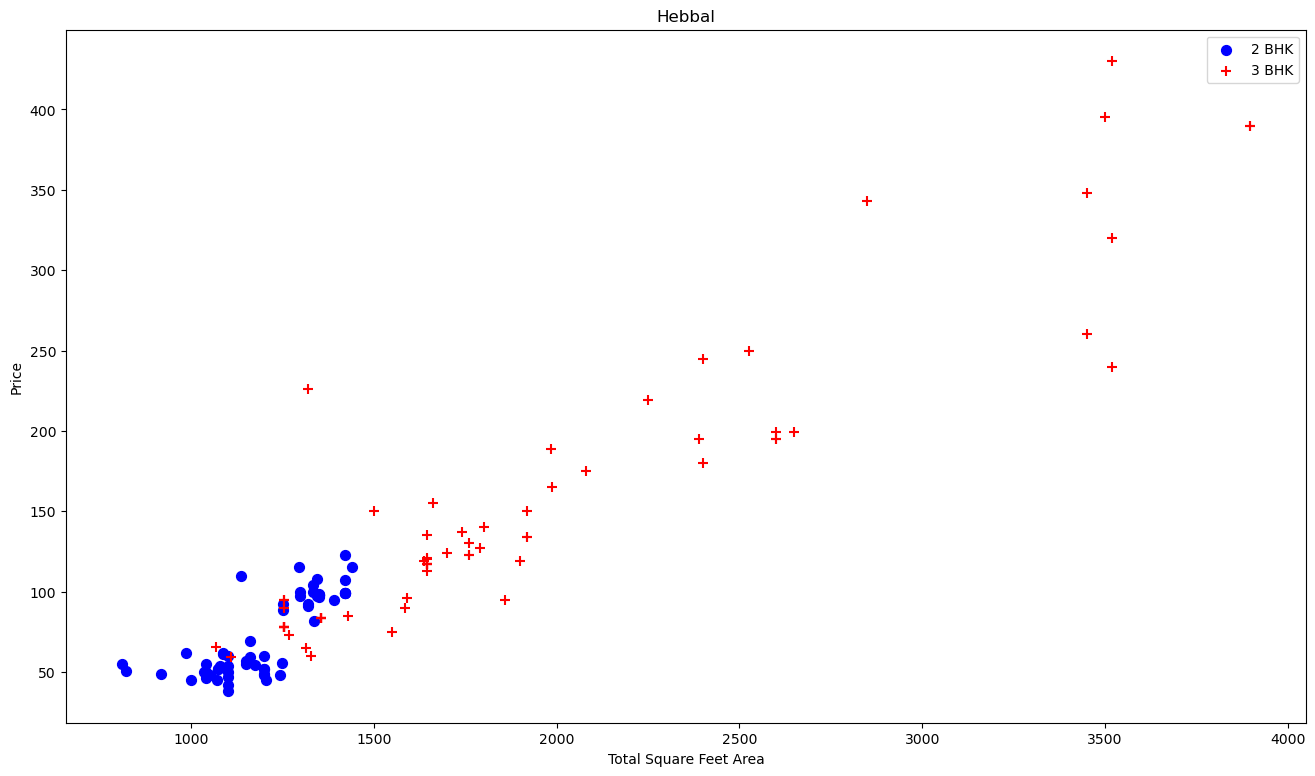

In [37]:

plot_scatter_chart(data, "Hebbal")
# in above scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier
 

In [38]:
# Removing BHK outliers
def remove_bhk_outliers(data):
  exclude_indices = np.array([])
  for location, location_df in data.groupby('location'):
    bhk_stats = {}
    for BHK, bhk_df in location_df.groupby('BHK'):
      bhk_stats[BHK]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for BHK, bhk_df in location_df.groupby('BHK'):
      stats=bhk_stats.get(BHK-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return data.drop(exclude_indices, axis='index')
 
data = remove_bhk_outliers(data)
data.shape

(9867, 11)

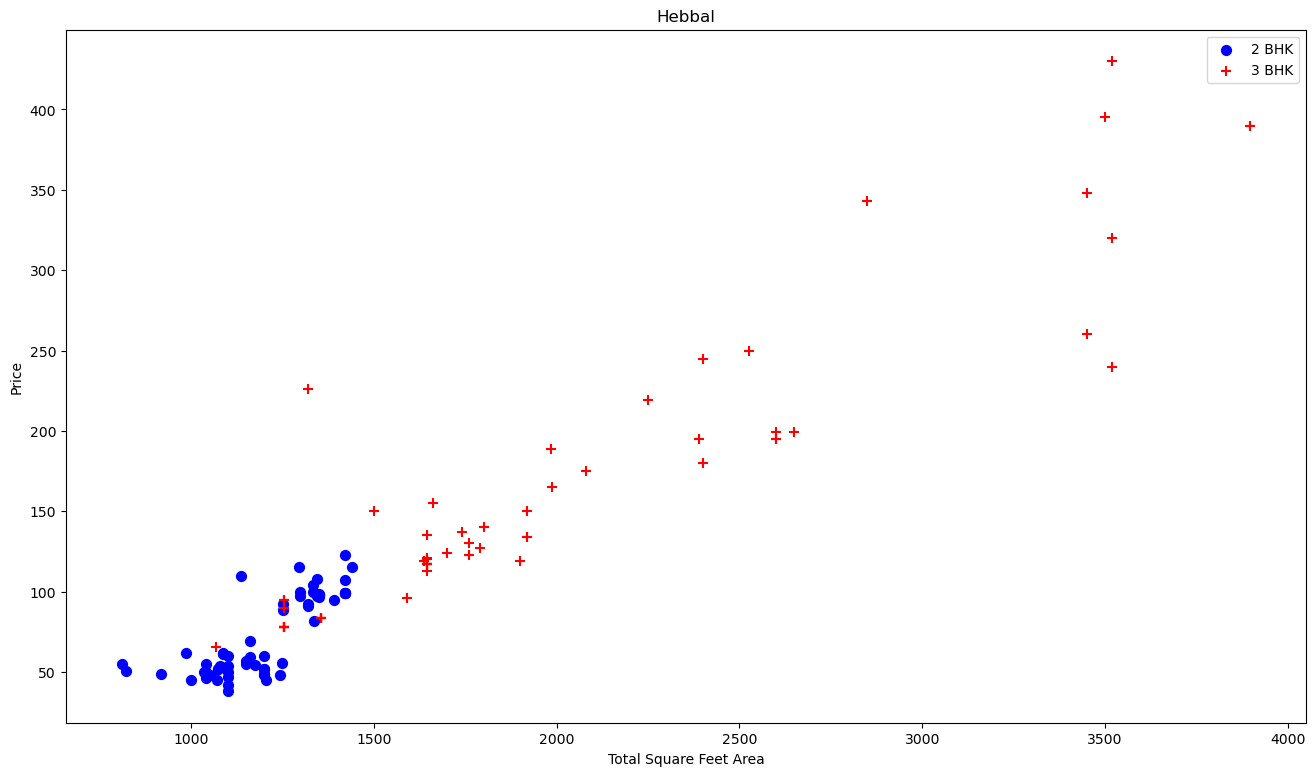

In [39]:
plot_scatter_chart(data, "Hebbal")
# In below scatter plot most of the red data point remove fron blue points

In [40]:
# Remove outliers using the help of 'bath' feature
 
data.bath.unique()
 

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

In [41]:
data[data.bath > data.BHK+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
1063,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,3300,14.0,1.584376,500.0,3300.0,9,15151.515152
2589,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
6766,Super built-up Area,19-Jan,Rajaji Nagar,5 BHK,7500,8.0,3.000000,1700.0,7500.0,5,22666.666667
7626,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
9873,Plot Area,Ready To Move,Sector 1 HSR Layout,3 Bedroom,2400,6.0,2.000000,775.0,2400.0,3,32291.666667
11256,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
11990,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330
12328,Plot Area,Ready To Move,Dollars Colony,4 Bedroom,4350,8.0,1.584376,2600.0,4350.0,4,59770.114943
12948,Plot Area,Ready To Move,Defence Colony,10 Bedroom,7150,13.0,1.584376,3600.0,7150.0,10,50349.650350


In [42]:
# here we are considering data only total no. bathroom =  bhk + 1
data = data[data.bath < data.BHK+2]
data.shape

(9737, 11)

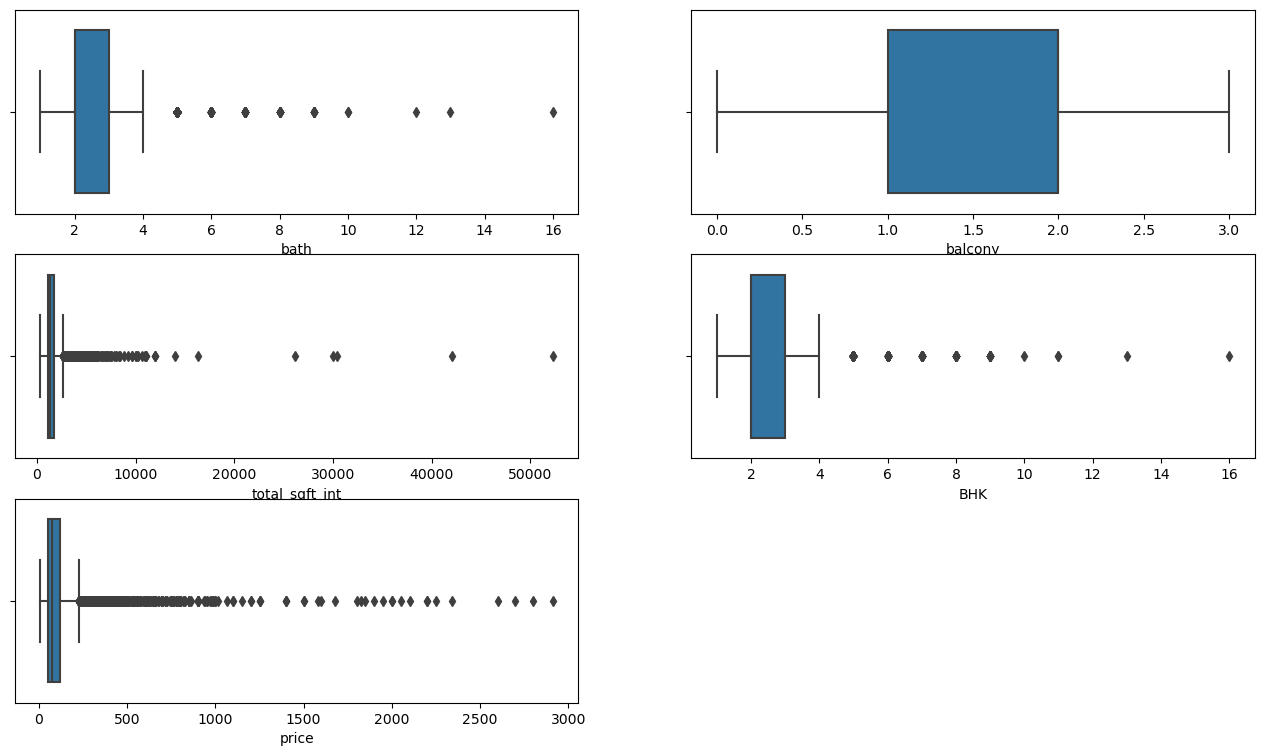

In [43]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(x=data[var])

In [44]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0,2,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0,2,4250.000000
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,2732.0,4,7467.057101


In [45]:
# Drop the folowing columns
data = data.drop(['area_type', 'availability',"size","total_sqft","balcony","price_per_sqft"], axis=1)
data.head()
 

,location,bath,price,total_sqft_int,BHK
0,Electronic City Phase II,2.0,39.07,1056.0,2
2,Uttarahalli,2.0,62.00,1440.0,3
3,Lingadheeranahalli,3.0,95.00,1521.0,3
4,Kothanur,2.0,51.00,1200.0,2
6,Old Airport Road,4.0,204.00,2732.0,4


In [46]:
# convert this data set into csv file
data.to_csv("cleaned_data.csv", index=False) 

# NOW WE CAN APPLYING MODEL ON THIS PREPROCESS DATA